# Laboratorium 3

### Konfiguracja

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.colors as mcolors
from matplotlib.widgets import Button
import json as js
import random
import math
import functools
import time
import heapq 

In [352]:
def gen_lines2(num):
    xMax = 100
    yMax = 100
    for _ in range(num):
        new_added_lines.append( [(int(random.uniform(0, xMax)), int(random.uniform(0, yMax)))
                                  , (int(random.uniform(0, xMax)), int(random.uniform(0, yMax))) ] )
def gen_lines(num):
    xMax = 100
    yMax = 100
    for _ in range(num):
        new_added_lines.append( Line(Point(random.uniform(0, xMax), random.uniform(0, yMax))
                                  , Point(random.uniform(0, xMax), random.uniform(0, yMax))))
def get_all_lines():
    return LinesCollection([ line.as_list() for line in new_added_lines])

EPS = 10**(-13)

def orient(a, b, c):
    arr = np.array([ [a[0] - c[0], a[1] - c[1]], [b[0]-c[0], b[1]-c[1]] ])
    det = np.linalg.det(arr)
    #print("det", det)
    if det-EPS > 0: return 1
    elif det+EPS < 0: return -1
    else: return 0
    
def intersect(a1, a2, b1, b2) :
    o1 = orient( a1 , a2 , b1 )
    o2 = orient( a1 , a2 , b2 )
    o3 = orient( b1 , b2 , a1 )
    o4 = orient( b1 , b2 , a2 )
    if ( o1 != o2 ) and ( o3 != o4 ) :
        return True
    else:
        return False
    
"""
http://www.izdebski.edu.pl/kategorie/Informatyka/Cwiczenie_02.pdf
x_p = a1.x + t * dX_a1_a2
y_p = a1.y + t * dY_a1_a2

    dX_a1_b1 * dY_b1_b2 - dY_a1_b1 * dX_b1_b2
t = -----------------------------------------
    dX_a1_a2 * dY_b1_b2 - dY_a1_a2 * dX_b1_b2
    
"""
def dX(a, b): return b[0] - a[0]
def dY(a, b): return b[1] - a[1]
def intersect_point(a1, a2, b1, b2):
    dX_a1_a2 = dX(a1, a2)
    dY_a1_a2 = dY(a1, a2)
    
    dX_a1_b1 = dX(a1, b1)
    dY_b1_b2 = dY(b1, b2)
    dY_a1_b1 = dY(a1, b1)
    dX_b1_b2 = dX(b1, b2)
    
    dX_a1_a2 = dX(a1, a2)
    dY_b1_b2 = dY(b1, b2)
    dY_a1_a2 = dY(a1, a2)
    dX_b1_b2 = dX(b1, b2)
    
    t = (dX_a1_b1 * dY_b1_b2 - dY_a1_b1 * dX_b1_b2) / (dX_a1_a2 * dY_b1_b2 - dY_a1_a2 * dX_b1_b2)
    
    return Point(a1[0] + t * dX_a1_a2, a1[1] + t * dY_a1_a2)

In [386]:
force_int = False
#new_added_lines = []
class Point:
    def __init__(self, x, y):
        if(force_int):
            self.x = int(x)
            self.y = int(y)
        else:      
            self.x = x
            self.y = y
    def __getitem__(self, index):
        if(index == 0): return self.x
        elif(index == 1): return self.y
        else: raise BaseException("error index __getitem__")
    def __repr__(self):
        return "p({},{})".format(self.x, self.y)
    def __len__(self):
        return 2
    def __eq__(self, other):
        return abs(self.x-other.x) < EPS and abs(self.y-other.y) < EPS
class Line:
    def __init__(self, p1, p2, sortBy="x"):
        if(sortBy == "x"):
            if(p1.x < p2.x):
                self.p1 = p1
                self.p2 = p2
            else:
                self.p1 = p2
                self.p2 = p1
                
    def intersect(self, other):
        if(not intersect(self.p1, self.p2, other.p1, other.p2)): return None
        else: return intersect_point(self.p1, self.p2, other.p1, other.p2)
        
    def is_above(self, other):
        o1 = orient(self.p1, self.p2, other.p1)
        o2 = orient(self.p1, self.p2, other.p2)
        if(o1+o2 >= 0 and o1*o2 >=0): return False
        return True
    
    def is_below(self, other):
        o1 = orient(self.p1, self.p2, other.p1)
        o2 = orient(self.p1, self.p2, other.p2)
        if(o1+o2 <= 0 and o1*o2 <=0): return False
        return True
    
    def __iter__(self):
        yield p1
        yield p2
    def __getitem__(self, index):
        if(index == 0): return self.p1
        elif(index == 1): return self.p2
        else: raise BaseException("error index __getitem__")
    def __repr__(self):
        return "l[{},{}]".format(self.p1, self.p2)
    def __eq__(self, other):
        return self.p1 == other.p1 and self.p1 == other.p2
        
    def __len__(self):
        return 2
    def as_list(self):
        return [(self.p1.x, self.p1.y), (self.p2.x, self.p2.y)]
    def __array__(self):       ## TODO 
        return np.asarray([np.asarray([self.p1.x, self.p1.y]), np.asarray([self.p2.x, self.p2.y])])
        #return np.asarray([np.asarray([p1.x, p1.y]), np.asarray([p2.x, p2.y])])

def lines_as_list(lines):
    return [ line.as_list() for line in lines]
def points_as_list(points):
    return [ (p.x, p.y) for p in points]
        

In [354]:

new_added_lines = []

class _Button_callback(object):
    def __init__(self, scenes):
        self.i = 0
        self.scenes = scenes
        self.adding_points = False
        self.added_points = []
        self.adding_lines = False
        self.added_lines = []

    def set_axes(self, ax):
        self.ax = ax
        
    def next(self, event):
        self.i = (self.i + 1) % len(self.scenes)
        self.draw()

    def prev(self, event):
        self.i = (self.i - 1) % len(self.scenes)
        self.draw()
        
    def draw(self):
        self.ax.clear()
        for collection in (self.scenes[self.i].points + self.added_points):
            if len(collection.points) > 0:
                self.ax.scatter(*zip(*(np.array(collection.points))), **collection.kwargs)
        for collection in (self.scenes[self.i].lines + self.added_lines):
            self.ax.add_collection(collection.get_collection())
        self.ax.autoscale()
        plt.draw()
        
    def add_point(self, event):
        self.adding_points = not self.adding_points
        self.new_line_point = None
        if self.adding_points:
            self.adding_lines = False
            self.added_points.append(PointsCollection())
         
    def add_line(self, event):
        self.adding_lines = not self.adding_lines
        self.new_line_point = None
        if self.adding_lines:
            self.adding_points = False
            self.added_lines.append(LinesCollection())

    def on_click(self, event):
        if event.inaxes != self.ax:
            return
        new_point = (event.xdata, event.ydata)
        if self.adding_points:
            self.added_points[-1].add_points([new_point])
            self.draw()
        elif self.adding_lines:
            if self.new_line_point is not None:
                self.added_lines[-1].add([self.new_line_point, new_point])
                new_added_lines.append( 
                    Line(
                        Point(self.new_line_point[0], self.new_line_point[1])
                        , Point(new_point[0], new_point[1])
                        ))
                self.new_line_point = None
                self.draw()
            else:
                self.new_line_point = new_point


### Interfejsy

[Dostępne kolory](https://matplotlib.org/3.1.1/gallery/color/named_colors.html)

[Dostępne znaczniki punktów](https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers)

In [355]:
class Scene:
    def __init__(self, points=[], lines=[]):
        self.points=points
        self.lines=lines

class PointsCollection:
    def __init__(self, points = [], **kwargs):
        self.points = points
        self.kwargs = kwargs
    
    def add_points(self, points):
        self.points = self.points + points

class LinesCollection:
    def __init__(self, lines = [], **kwargs):
        self.lines = lines
        self.kwargs = kwargs
        
    def add(self, line):
        self.lines.append(line)
        
    def get_collection(self):
        return mcoll.LineCollection(self.lines, **self.kwargs)
    
class Plot:
    def __init__(self, scenes = [], json = None):
        if json is None:
            self.scenes = scenes
        else:
            self.scenes = [Scene([PointsCollection(pointsCol) for pointsCol in scene["points"]], 
                                 [LinesCollection(linesCol) for linesCol in scene["lines"]]) 
                           for scene in js.loads(json)]
        
    def add_scene(self, scene):
        self.scenes.append(scene)
    
    def add_scenes(self, scenes):
        self.scenes = self.scenes + scenes
        
    def toJson(self):
        return js.dumps([{"points": [np.array(pointCol.points).tolist() for pointCol in scene.points], 
                          "lines":[linesCol.lines for linesCol in scene.lines]} 
                         for scene in self.scenes])

    def __configure_buttons(self, callback):
        plt.subplots_adjust(bottom=0.2)
        ax_prev = plt.axes([0.6, 0.05, 0.15, 0.075])
        ax_next = plt.axes([0.76, 0.05, 0.15, 0.075])
        ax_add_point = plt.axes([0.44, 0.05, 0.15, 0.075])
        ax_add_line = plt.axes([0.28, 0.05, 0.15, 0.075])
        b_next = Button(ax_next, 'Następny')
        b_next.on_clicked(callback.next)
        b_prev = Button(ax_prev, 'Poprzedni')
        b_prev.on_clicked(callback.prev)
        b_add_point = Button(ax_add_point, 'Dodaj punkt')
        b_add_point.on_clicked(callback.add_point)
        b_add_line = Button(ax_add_line, 'Dodaj linię')
        b_add_line.on_clicked(callback.add_line)
        return [b_prev, b_next, b_add_point, b_add_line]
    
    def draw(self):
        plt.close('all')
        fig = plt.figure()
        callback = _Button_callback(self.scenes)
        self.widgets = self.__configure_buttons(callback)
        ax = plt.axes()
        callback.set_axes(ax)
        fig.canvas.mpl_connect('button_press_event', callback.on_click)
        plt.show()
        callback.draw()
        


### Przykłady użycia

##### Proste rysowanie

Należy utworzyć zmienną z obiuektem `Plot`, który przyjmuje jako parametr konstruktora listę scen lub string ze scenami w formacie json. Następnie po dodaniu wszystkich, na samym końcu programu, należy wywołać jego metodę `draw()`.

In [ ]:
%matplotlib notebook
new_added_lines = []
scenes = []
scenesQQ=[Scene([PointsCollection([(1, 2), (3, 1.5), (2, -1)]), 
               PointsCollection([(5, -2), (2, 2), (-2, -1)], color='green', marker = "^")], 
              [LinesCollection([[(1,2),(2,3)], [(0,1),(1,0)]])]), 
        Scene([PointsCollection([(1, 2), (3, 1.5), (2, -1)], color='red'), 
               PointsCollection([(5, -2), (2, 2), (-2, 1)], color='black')], 
              [LinesCollection([[(-1,2),(-2,3)], [(0,-1),(-1,0)]])])]

plot = Plot(scenesQQ)
plot.add_scene(Scene([PointsCollection([(2, 1)])], [LinesCollection([[(1,2),(2,3)]])]))
plot.draw() 


In [ ]:
new_added_lines

###### Zapis i odczyt z pliku

Klasa Plot posiada metodę `toJson()`, która zwraca string zawierający listę scen w formacie JSON. Taki string można normalnie zapisać do pliku stosując normalne sposoby dostępne w Pythonie. Wczytanie listy scen z pliku dokonuje się poprzez podanie parametru `json` w kostruktorze `Plot`.

In [ ]:
scenes=[Scene([PointsCollection([(-2, -1)], color='green', marker = "^")], 
              [LinesCollection([[(1,2),(2,3)], [(0,1),(1,0)]])]), 
        Scene([PointsCollection([(1, 2), (3, 1.5)], color='red'), 
               PointsCollection([(5, -2)], color='black')])]
plot = Plot(scenes)

with open('somefile.json', 'w') as file:
    file.write(plot.toJson())
    
#somefile.txt: [{"points": [[[-2, -1]]], "lines": [[[[1, 2], [2, 3]], [[0, 1], [1, 0]]]]}, {"points": [[[1.0, 2.0], [3.0, 1.5]], [[5, -2]]], "lines": []}]
    
with open('somefile.json', 'r') as file:
    json = file.read()
    
plot2 = Plot(json=json)
plot2.draw()

### Rozwiązanie

<IPython.core.display.Javascript object>


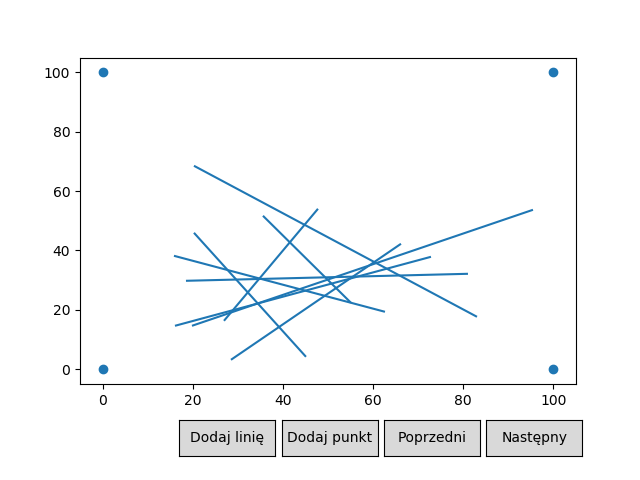

In [402]:
%matplotlib notebook
new_added_lines = []
scenes=[Scene([PointsCollection([(0,0),(0,100),(100,0),(100,100)])])]

plot = Plot(scenes)
plot.add_scene(Scene([PointsCollection([(2, 1)])], [LinesCollection([[(1,2),(2,3)]])]))
plot.draw() 



In [348]:
gen_lines(10)

In [401]:
new_added_lines = []

<IPython.core.display.Javascript object>


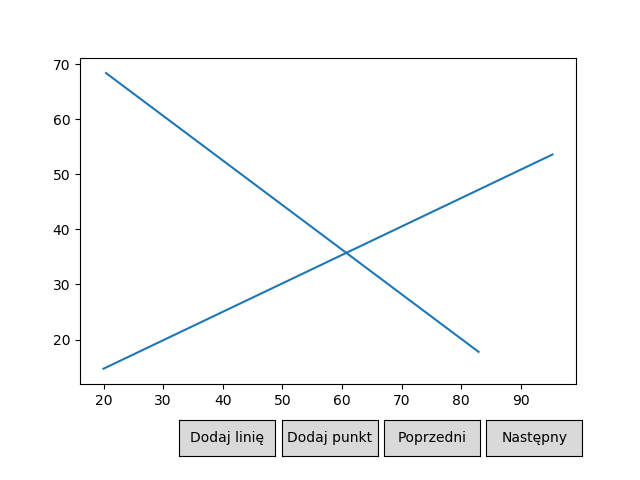

In [403]:
%matplotlib notebook

scenes=[Scene([], [get_all_lines()])]

plot = Plot(scenes)
plot.draw() 

In [351]:
new_added_lines = []

In [404]:
"start", "end", "cross"
class Event:
    def __init__(self, type, point, line=None, cross=None):
        self.type = type
        self.point = point
        self.line = line
        self.cross = cross
        
    def __repr__(self):
        return "Event {} :: {}".format(self.type, self.point)
    def __lt__(self, other): return self.point.x < other.point.x
    def __gt__(self, other): return self.point.x > other.point.x
    
def sort_events(events):
    heapq.heapify(events)
    return (events)

maxY = 100

def intersect_with_sweeper(line, mX): 
    #return Point(line, line)
    return intersect_point(line[0], line[1], (mX, 0), (mX, maxY))

def insert_line(array, line, mX):
    if(len(array)) == 0: 
        array.append(line)
        return len(array)-1
    
    myIntersection = intersect_with_sweeper(line, mX)
    if(len(array)) == 1: 
        if(intersect_with_sweeper(array[0], mX).y < myIntersection.y):
            array.append(line)
            return len(array)-1
        else:
            array.insert(0, line)
            return 0
    
    myIntersection = intersect_with_sweeper(line, mX)
    low = 0
    high = len(array)
    mid = int((low+high)/2)
    while(high - low > 1):
        mid = int((low+high)/2)
        midIntersection = intersect_with_sweeper(array[mid], mX)
        if(midIntersection.y <= myIntersection.y):
            low = mid
        else:
            high = mid
    
    # low - element mniejszy
    # high - poza listą lub element wiekszy
    if(high < len(array)):
        if(intersect_with_sweeper(array[high], mX).y < myIntersection.y):
            array.append(line)
            return len(array) -1
        else:
            if(intersect_with_sweeper(array[low], mX).y < myIntersection.y):
                array.insert(high, line)
                return high
            else:
                array.insert(low, line)
                return low
    else:
        array.append(line) 
        return len(array) -1

def find_line(array, line, mX):
    if(len(array)) == 0: 
        return None
    mX -= 0.5
    myIntersection = intersect_with_sweeper(line, mX)
    print("myIntersection", myIntersection)
    low = 0
    high = len(array)
    while(high - low > 1):
        mid = int((low+high)/2)
        midIntersection = intersect_with_sweeper(array[mid], mX)
        print("inloop", low, mid, high, midIntersection.y, myIntersection.y)
        if(midIntersection.y <= myIntersection.y):
            low = mid
        else:
            high = mid
    
    # low - element mniejszy
    # high - poza listą lub element wiekszy
    #print(line, [high], [low])
    if(high < len(array) and array[high] == line): return high
    else:
        while(low < len(array) and myIntersection.y - intersect_with_sweeper(array[low], mX).y < 10**(-8) ):
            print("difff ",myIntersection.y - intersect_with_sweeper(array[low], mX).y)
            low += 1
        low -= 1
        while(low >= 0 and myIntersection.y - intersect_with_sweeper(array[low], mX).y < 10**(-8) ):
            print("difff ",myIntersection.y - intersect_with_sweeper(array[low], mX).y)
            print("low", low, array[low] == line, array[low], line)
            if(array[low] == line): 
                print("ret low, ",low)
                return low
            low -= 1
    print("ret lNone")
    return None

def sweep():
    maxY = 100
    mX = 0
    def intersect_with_sweeper(line): return intersect_point(line[0], line[1], (mX, 0), (mX, maxY)).y
    def test_intersection(ind1, ind2):
        if(ind1<0 or ind1>=len(cross_lines) or ind2<0 or ind2>=len(cross_lines)): return
        line_A = cross_lines[ind1]
        line_B = cross_lines[ind2]
        intersection = line_A.intersect(line_B)
        if(intersection is not None and intersection.x > mX):
            print("Intersection ", intersection)
            cross_event = Event("cross", intersection, cross=(line_A, line_B))
            heapq.heappush(event_points, cross_event)

            intersection_points_list.append(intersection)
    
    start_points = [Event("start", line[0], line) for line in new_added_lines]
    end_points =  [Event("end", line[1], line) for line in new_added_lines]
    event_points = sort_events(start_points + end_points)
    intersection_points_list = []
    lines_list = new_added_lines
    cross_lines = []
    # iteracja
    while(len(event_points) > 0):
        #print([intersect_with_sweeper(line) for line in cross_lines])
        cEvent = heapq.heappop(event_points)
        mX = cEvent.point.x
        if(cEvent.type == "start"): 
            mX += 0.5
            cross_lines = sorted(cross_lines, key=intersect_with_sweeper)
            mX -= 0.5
            insert_index = insert_line(cross_lines, cEvent.line, mX)
            print("insert_index", insert_index)
            test_intersection(insert_index-1, insert_index)
            test_intersection(insert_index, insert_index+1)
        elif(cEvent.type == "end") : 
            mX += 0.5
            cross_lines = sorted(cross_lines, key=intersect_with_sweeper)
            mX -= 0.5
            #cross_lines = sorted(cross_lines, key=intersect_with_sweeper)
            lineIndex = find_line(cross_lines, cEvent.line, mX)
            print("del", lineIndex)
            del cross_lines[lineIndex]
            test_intersection(lineIndex-1, lineIndex)
        elif(cEvent.type == "cross"): 
            mX += 0.5
            cross_lines = sorted(cross_lines, key=intersect_with_sweeper)
            mX -= 0.5
            print([intersect_with_sweeper(line) for line in cross_lines])
            #print("cross", cEvent.cross[0][0].y, cEvent.cross[1][0].y)
            #print([line[0].y for line in cross_lines])
            index1_temp = find_line(cross_lines, cEvent.cross[0], mX)
            index2_temp = find_line(cross_lines, cEvent.cross[1], mX)
            print(index1_temp, index2_temp)
            index1 = min(index1_temp, index2_temp)
            index2 = max(index1_temp, index2_temp)
            print("cross", index1, index2)
            #print(cross_lines)
            cross_lines[index1], cross_lines[index2] = cross_lines[index2], cross_lines[index1]
            test_intersection(index1-1, index1)
            test_intersection(index2, index2+1)
            #print(cross_lines)
            #mX += 0.5
            #cross_lines = sorted(cross_lines, key=intersect_with_sweeper)

        #for i, line_A in enumerate(cross_lines[:-1]):
            #test_intersection(i, i+1)
            
                
    return  intersection_points_list
    

sweep()

insert_index 0
insert_index 1
Intersection  p(60.71518665554693,35.74575922279567)
[35.74575922279565, 35.745759222795684]
myIntersection p(60.21518665554693,35.487275955439515)
inloop 0 1 2 35.487275955439515 35.487275955439515
difff  0.0
difff  0.0
low 1 False l[p(19.828129852326686,14.608519152648995),p(95.46227803781058,53.70884264601693)] l[p(19.828129852326686,14.608519152648995),p(95.46227803781058,53.70884264601693)]
difff  -0.663916492634435
low 0 False l[p(20.271731894470282,68.5399998331565),p(83.04142085778976,17.642164940927536)] l[p(19.828129852326686,14.608519152648995),p(95.46227803781058,53.70884264601693)]
ret lNone
myIntersection p(60.215186655546944,36.15119244807395)
inloop 0 1 2 35.487275955439515 36.15119244807395
difff  0.0
low 0 False l[p(20.271731894470282,68.5399998331565),p(83.04142085778976,17.642164940927536)] l[p(20.271731894470282,68.5399998331565),p(83.04142085778976,17.642164940927536)]
ret lNone
None None


TypeError: '<' not supported between instances of 'NoneType' and 'NoneType'

In [399]:
l1 = Line(Point(10,10), Point(11,10))
l2 = Line(Point(10,11), Point(11,9))
l1.is_below(l2)

False

In [393]:
%matplotlib notebook

scenes=[Scene([PointsCollection(points_as_list(sweep()), color="red")], [get_all_lines()])]

plot = Plot(scenes)
plot.draw() 

insert_index 0
insert_index 0
Intersection  p(34.70969744849361,30.388329620092748)
[30.388329620092744, 30.388329620092748]
myIntersection p(34.20969744849361,29.4829744342099)
inloop 0 1 2 30.36946805372019 29.4829744342099
difff  0.0
difff  -0.8864936195102899
difff  -0.8864936195102899
low 1 False l[p(18.497323725895885,29.77674809404172),p(81.04521166814355,32.13625037381394)] l[p(26.925762526624293,16.29387792391485),p(47.775058507373515,54.04591440027011)]
difff  0.0
low 0 False l[p(26.925762526624293,16.29387792391485),p(47.775058507373515,54.04591440027011)] l[p(26.925762526624293,16.29387792391485),p(47.775058507373515,54.04591440027011)]
ret lNone
myIntersection p(34.20969744849361,30.36946805372019)
inloop 0 1 2 30.36946805372019 30.36946805372019
difff  0.0
difff  0.0
low 1 False l[p(18.497323725895885,29.77674809404172),p(81.04521166814355,32.13625037381394)] l[p(18.497323725895885,29.77674809404172),p(81.04521166814355,32.13625037381394)]
ret lNone
None None


TypeError: '<' not supported between instances of 'NoneType' and 'NoneType'